## NLP Final - Notebook #4 (Targeted Sentiment)
Author: Natalie Kim

Quarter: Winter 2025

In [1]:
import pandas as pd

df = pd.read_csv("df_all_ner.csv")
df.shape

(82327, 11)

In [2]:
# subset of data
df_sub = df.sample(frac=0.2, random_state=2)
df_sub.shape

(16465, 11)

In [3]:
df_sub.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean,ner_entities
38833,https://www.philippinesnewsgazette.com/mindzie...,2024-03-12,mindzie Unveils AI Process Intelligence Copilo...,mindzie unveils ai process intelligence copilo...,mindzie Unveils AI Process Intelligence Copilo...,mindzie unveils ai process intelligence copilo...,mindzie unveils ai process intelligence copilo...,mindzie unveils ai process intelligence copilo...,0,mindzie Unveils AI Process Intelligence Copilo...,"{'PERSON': ['James Henderson', 'mindzie'], 'NO..."
25976,https://www.gadgets360.com/apps/news/mail-app-...,2025-01-20,Apple May Bring Redesigned Mail App With AI Ca...,apple may bring redesigned mail app with ai ca...,Apple May Bring Redesigned Mail App With AI Ca...,apple may bring redesigned mail app with ai ca...,apple may bring redesigned mail app with ai ca...,apple bring redesigned mail app ai capabilitie...,16,Apple May Bring Redesigned Mail App With AI Ca...,"{'PERSON': ['Manas Mitul', 'Mark Gurman Techno..."
75208,https://www.pcmag.com/articles/uplevel-your-cr...,2024-04-27,Uplevel Your Creative Output With Adobe Photos...,uplevel your creative output with adobe photos...,Uplevel Your Creative Output With Adobe Photos...,uplevel your creative output with adobe photos...,uplevel your creative output with adobe photos...,uplevel creative output adobe photoshops new a...,30,Uplevel Your Creative Output With Adobe Photos...,{'PERSON': ['Sharpen Your Images With Enhance ...
1187,https://thebrockvilleobserver.ca/uncategorized...,2021-06-03,Artificial Intelligence Ai In Life Sciences Ma...,artificial intelligence ai in life sciences ma...,Artificial Intelligence Ai In Life Sciences Ma...,artificial intelligence ai in life sciences ma...,artificial intelligence ai in life sciences ma...,artificial intelligence ai life sciences marke...,0,Artificial Intelligence Ai In Life Sciences Ma...,"{'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [..."
36712,https://www.cnbctv18.com/technology/66-people-...,2023-04-05,66% People Believe That Ai Development Should ...,66% people believe that ai development should ...,66% People Believe That Ai Development Should ...,66% people believe that ai development should ...,66% people believe that ai development should ...,66 people believe ai development pause report ...,3,66% People Believe That Ai Development Should ...,"{'PERSON': ['Yuval Noah Harari', 'Steve Woznia..."


In [4]:
from collections import Counter

import multiprocessing as mp
num_processors = mp.cpu_count()
print(f"Number of CPU processors: {num_processors}")

workers = num_processors-1
print(f'Using {workers} workers')

Number of CPU processors: 8
Using 7 workers


In [5]:
import time
start_time = time.time()

def tic():
    global start_time 
    start_time = time.time()

def tac():
    t_sec = round(time.time() - start_time)
    (t_min, t_sec) = divmod(t_sec,60)
    (t_hour,t_min) = divmod(t_min,60) 
    print(f'Execution time to calculate for topic {k}: {t_hour}hour:{t_min}min:{t_sec}sec'.format(t_hour,t_min,t_sec))

In [6]:
types_in_column = df_sub['ner_entities'].apply(lambda x: type(x))
print(types_in_column.unique())

[<class 'str'>]


In [7]:
import ast

# need to convert string representations to dictionaries
def parse_entities(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except Exception as e:
            print(f"Error parsing entities: {e}")
            return {}
    return x

# convert 'ner_entities' to dictionary
df_sub['ner_entities'] = df_sub['ner_entities'].apply(parse_entities)

In [8]:
# organizations, people, locations
labels = ['PERSON', 'NORP', 'FAC', 'ORG', 'GPE', 'LOC']

counters = {label: Counter() for label in labels}

for entities in df_sub['ner_entities']:
    for label in labels:
        if label in entities:
            counters[label].update(entities[label])

top_groups = {label: [entity for entity, count in counters[label].most_common(50)] for label in labels}

max_len = max(len(lst) for lst in top_groups.values())

data2 = {}
for label in labels:
    padded = top_groups[label] + [""] * (max_len - len(top_groups[label]))
    data2[label] = padded

df_top_groups = pd.DataFrame(data2)
df_top_groups

,PERSON,NORP,FAC,ORG,GPE,LOC
0,Sam Altman,Chinese,Chat GPT,AI,US,Europe
1,Elon Musk,American,Org View,Google,U.S.,North America
2,Biden,Indian,Bletchley Park,Microsoft,India,Asia
3,Altman,European,Chat GPT's,GPT,China,Silicon Valley
4,COVID-19,British,the White House,Apple,UK,Africa
5,Bard,Americans,EURUSD,Amazon,California,Middle East
6,Joe Biden,French,Broadway,Twitter,New York,Latin America
7,Audio Gray,Canadian,Chat GPT Plus,Facebook,Canada,Earth
8,Musk,German,Program Transportation Small Small Franchises,"Gray Television, Inc.",Japan,South America
9,Satya Nadella,Russian,Vatican,PRNewswire,France,Asia-Pacific


### What types of companies (based on the lines of business) are planning to invest in these technologies today or near future (success stories)?

In [9]:
df_sub['date'] = pd.to_datetime(df_sub['date'])

# filter articles for the years 2024 and 2025 for most recent articles
df_filtered = df_sub[df_sub['date'].dt.year.isin([2024, 2025])]

In [10]:
labels = ['ORG', 'PERSON', 'GPE', 'FAC']

investor_counter = {label: Counter() for label in labels}

for entities in df_sub['ner_entities']:
    for label in labels:
        if label in entities:
            investor_counter[label].update(entities[label])

top_groups = {label: [entity for entity, count in investor_counter[label].most_common(30)] for label in labels}

max_len = max(len(lst) for lst in top_groups.values())

data2 = {}
for label in labels:
    padded = top_groups[label] + [""] * (max_len - len(top_groups[label]))
    data2[label] = padded

df_top_groups = pd.DataFrame(data2)
df_top_groups

,ORG,PERSON,GPE,FAC
0,AI,Sam Altman,US,Chat GPT
1,Google,Elon Musk,U.S.,Org View
2,Microsoft,Biden,India,Bletchley Park
3,GPT,Altman,China,Chat GPT's
4,Apple,COVID-19,UK,the White House
5,Amazon,Bard,California,EURUSD
6,Twitter,Joe Biden,New York,Broadway
7,Facebook,Audio Gray,Canada,Chat GPT Plus
8,"Gray Television, Inc.",Musk,Japan,Program Transportation Small Small Franchises
9,PRNewswire,Satya Nadella,France,Vatican


In [11]:
# topic dictionary
topic_dict = {
    0: "Finance",
    2: "ChatGPT", 
    3: "Politics", 
    4: "Healthcare", 
    6: "Energy/Climate", 
    7: "Education", 
    8: "Image Generation", 
    9: "Nvidia Chips",
    10: "Sam Altman",
    11: "Elon Musk",
    12: "AI & Law",
    13: "Music", 
    14: "Retail", 
    15: "Jobs",
    16: "Apple & iPhones", 
    18: "Vehicles", 
    19: "Sports",
    20: "China AI Technology",
    22: "Drug Discovery",
    26: "Data Science Learning (Courses)", 
    31: "Insurance",
    33: "AI Impact on Shares",
    34: "Samsung",
    37: "Environment", 
    38: "AI Performance", 
    40: "Clearview", 
    49: "Safety", 
    56: "Agriculture", 
    64: "Real Estate", 
    69: "Travel/Hospitality", 
    76: "Brain Research", 
    85: "Business", 
    86: "Medical"
}

In [12]:
# top topics in this filtered dataset
topic_counts = df_filtered['topic'].value_counts().reset_index()
topic_counts.columns = ['topic', 'count']
topic_counts = topic_counts.sort_values('count', ascending=False)

topic_counts['topic_name'] = topic_counts['topic'].map(topic_dict)
print("\nTop Topics:")
topic_counts.head(20)


Top Topics:


,topic,count,topic_name
0,0,1200,Finance
1,2,382,ChatGPT
2,3,237,Politics
3,16,235,Apple & iPhones
4,9,224,Nvidia Chips
5,8,223,Image Generation
6,6,173,Energy/Climate
7,34,156,Samsung
8,4,142,Healthcare
9,11,140,Elon Musk


### First Pass at Targeted Sentiment

In [36]:
""" 
Target Sentiment Analysis
Need to apply to organizations, products, and see if there are any negative
seniment overall
"""
import nltk
from transformers import pipeline

nltk.download('punkt', quiet=True)

sentiment_pipe = pipeline("text-classification", 
                            model="siebert/sentiment-roberta-large-english", 
                            device=-1, 
                            truncation=True)

Device set to use cpu


In [42]:
target_entities = {
    "ORG": ["Microsoft", "Google", "Nvidia", "IBM", "Amazon", "GPT", "White House", "Congress", "FDA", "NASA", "Meta", "FCC"],
    "PERSON": ["Sam Altman", "Elon Musk", "Musk"],
    "GPE": ["US", "U.S.", "the United States", "America", "India", "China", "Russia"]
}

In [43]:
def targeted_sentiment_for_entity(text, target):
    """
    Computes the average sentiment for sentences in 'text' that mention the 'target' entity.
    Returns a numeric score (positive for positive sentiment, negative for negative sentiment).
    """
    sentences = nltk.sent_tokenize(text)
    scores = []
    target_lower = target.lower()
    for sent in sentences:
        if target_lower in sent.lower():
            try:
                result = sentiment_pipe(sent)[0]
                score = result['score'] if result['label'] == "POSITIVE" else -result['score']
                scores.append(score)
            except Exception as e:
                # Optionally print(e) for debugging.
                continue
    return sum(scores) / len(scores) if scores else None

In [44]:
# for a given article, apply targeted sentiment on all entities for a given label (e.g., “ORG” or “PRODUCT”)
# return an average score
def compute_target_sentiment(row, label):
    """
    For a given row, compute the average targeted sentiment for all entities
    of a specified label (e.g., 'ORG' or 'PRODUCT') found in the article.
    """
    text = row["textandtitle_clean"]
    
    # Ensure the 'entities' column is a dictionary.
    if not isinstance(row["ner_entities"], dict):
        return None
    
    entities_list = row["ner_entities"].get(label, [])
    entity_sentiments = []
    
    for ent in entities_list:
        score = targeted_sentiment_for_entity(text, ent)
        if score is not None:
            entity_sentiments.append(score)
    if entity_sentiments:
        return sum(entity_sentiments) / len(entity_sentiments)
    else:
        return None

In [45]:
results = []

# Loop over each category and target entity
for category, entities in target_entities.items():
    for entity in entities:
        # Compute targeted sentiment for each article for the given entity
        sentiments = df_sub['text_clean_topic'].apply(lambda x: targeted_sentiment_for_entity(x, entity))
        # Compute the average sentiment for that entity across all articles (ignoring None values)
        avg_sent = sentiments.dropna().mean()
        results.append({
            "Entity": entity,
            "Category": category,
            "Avg_Sentiment": avg_sent
        })

In [ ]:
"""
# above ran for 578 minutes
may want to try and adjust to track progress like in this code:
%%time

if __name__ == '__main__':
    # Get the list of texts from the DataFrame
    texts = df_sent['text_clean_topic'].tolist()
    
    # Create a pool of workers and map the function over your text list with a progress bar.
    with mp.Pool(workers) as pool:
        sentiment_scores = list(tqdm(pool.imap(get_sentiment_score, texts), total=len(texts)))
    
    # Save the results back to the DataFrame
    df_sent['sentiment_score'] = sentiment_scores
"""

In [46]:
# Create a summary DataFrame
df_target_sent = pd.DataFrame(results)
# print(df_target_sent)

In [49]:
df_target_sent.shape

(22, 3)

In [50]:
df_target_sent

,Entity,Category,Avg_Sentiment
0,Microsoft,ORG,0.701730
1,Google,ORG,0.759429
2,Nvidia,ORG,0.817004
3,IBM,ORG,0.905492
4,Amazon,ORG,0.784269
5,GPT,ORG,0.609987
6,White House,ORG,0.675101
7,Congress,ORG,0.693850
8,FDA,ORG,0.883202
9,NASA,ORG,0.708616


### Updated Code Starts Here

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

import nltk
nltk.download('punkt', quiet=True)
from nltk.tokenize import sent_tokenize

from transformers import AutoTokenizer, pipeline
from pandarallel import pandarallel
import pandas as pd

In [14]:
pandarallel.initialize(nb_workers= workers, progress_bar=True)

INFO: Pandarallel will run on 7 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [ ]:
pipe = pipeline("text-classification", 
                model="siebert/sentiment-roberta-large-english", 
                device=-1, 
                truncation=True)

Device set to use cpu


In [27]:
target_entities = {
    "ORG": ["Microsoft", "Google", "Nvidia", "IBM", "Amazon", "GPT", "White House", "Congress", "FDA", "NASA", "Meta", "FCC",
            "Clearview", "Pfizer", "OneSoil", "Booking.com", "Adobe"],
    "PERSON": ["Sam Altman", "Elon Musk", "Joe Biden", "Satya Nadella", "Donald Trump", "Mark Zuckerberg"],
    "GPE": ["US", "the United States", "America", "India", "China", "Russia", "California", "New York"]
}

In [31]:
target_entity_lookup = {
    entity.lower(): entity  # Maintain original casing for output
    for category, entities in target_entities.items()
    for entity in entities
}

In [32]:
def targeted_sentiment_for_article(text, ner_entities):
    """
    Computes sentiment scores for target entities found in the article's NER results.
    Returns a dictionary where keys are entities and values are their average sentiment scores.
    """
    if not isinstance(text, str) or not isinstance(ner_entities, dict):
        return None  # Ensure valid input types

    sentences = sent_tokenize(text)
    if not sentences:
        return None  # Skip empty text

    entity_sentiments = {}

    # Extract relevant entities from ner_entities
    matching_entities = set()  # To store matched target entities
    
    for entity_type, extracted_entities in ner_entities.items():
        if entity_type in target_entities:  # Check if entity type is relevant
            for ent in extracted_entities:
                ent_lower = ent.lower()
                if ent_lower in target_entity_lookup:
                    matching_entities.add(target_entity_lookup[ent_lower])  # Store original-cased entity

    if not matching_entities:
        return None  # Skip if no matching entities

    for entity in matching_entities:
        target_lower = entity.lower()
        scores = []

        for sent in sentences:
            if target_lower in sent.lower():
                try:
                    result = pipe(sent)[0]
                    score = result['score'] if result['label'] == "POSITIVE" else -result['score']
                    scores.append(score)
                except Exception as e:
                    print(f"Error processing sentence: {sent} -> {e}")  # Debugging

        if scores:
            entity_sentiments[entity] = sum(scores) / len(scores)

    return entity_sentiments if entity_sentiments else None

In [33]:
df_sub["entity_sentiments"] = df_sub.parallel_apply(
    lambda row: targeted_sentiment_for_article(row.get("textandtitle_clean", ""), row.get("ner_entities", {})),
    axis=1
)

In [35]:
df_sub.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean,ner_entities,entity_sentiments
38833,https://www.philippinesnewsgazette.com/mindzie...,2024-03-12,mindzie Unveils AI Process Intelligence Copilo...,mindzie unveils ai process intelligence copilo...,mindzie Unveils AI Process Intelligence Copilo...,mindzie unveils ai process intelligence copilo...,mindzie unveils ai process intelligence copilo...,mindzie unveils ai process intelligence copilo...,0,mindzie Unveils AI Process Intelligence Copilo...,"{'PERSON': ['James Henderson', 'mindzie'], 'NO...",None
25976,https://www.gadgets360.com/apps/news/mail-app-...,2025-01-20,Apple May Bring Redesigned Mail App With AI Ca...,apple may bring redesigned mail app with ai ca...,Apple May Bring Redesigned Mail App With AI Ca...,apple may bring redesigned mail app with ai ca...,apple may bring redesigned mail app with ai ca...,apple bring redesigned mail app ai capabilitie...,16,Apple May Bring Redesigned Mail App With AI Ca...,"{'PERSON': ['Manas Mitul', 'Mark Gurman Techno...",{'NASA': 0.9945863485336304}
75208,https://www.pcmag.com/articles/uplevel-your-cr...,2024-04-27,Uplevel Your Creative Output With Adobe Photos...,uplevel your creative output with adobe photos...,Uplevel Your Creative Output With Adobe Photos...,uplevel your creative output with adobe photos...,uplevel your creative output with adobe photos...,uplevel creative output adobe photoshops new a...,30,Uplevel Your Creative Output With Adobe Photos...,{'PERSON': ['Sharpen Your Images With Enhance ...,"{'Amazon': 0.9973123868306478, 'GPT': 0.997931..."
1187,https://thebrockvilleobserver.ca/uncategorized...,2021-06-03,Artificial Intelligence Ai In Life Sciences Ma...,artificial intelligence ai in life sciences ma...,Artificial Intelligence Ai In Life Sciences Ma...,artificial intelligence ai in life sciences ma...,artificial intelligence ai in life sciences ma...,artificial intelligence ai life sciences marke...,0,Artificial Intelligence Ai In Life Sciences Ma...,"{'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [...","{'Russia': 0.9961632490158081, 'India': 0.9961..."
36712,https://www.cnbctv18.com/technology/66-people-...,2023-04-05,66% People Believe That Ai Development Should ...,66% people believe that ai development should ...,66% People Believe That Ai Development Should ...,66% people believe that ai development should ...,66% people believe that ai development should ...,66 people believe ai development pause report ...,3,66% People Believe That Ai Development Should ...,"{'PERSON': ['Yuval Noah Harari', 'Steve Woznia...","{'Elon Musk': 0.9973454773426056, 'Russia': 0...."


In [36]:
df_targ_sent = df_sub.drop(columns=["url", "title_clean_lower", "text_clean_ner",
                                     "text_clean_topic", "title_text", "bert_title_text"])

df_targ_sent.head()

,date,title_clean,topic,textandtitle_clean,ner_entities,entity_sentiments
38833,2024-03-12,mindzie Unveils AI Process Intelligence Copilo...,0,mindzie Unveils AI Process Intelligence Copilo...,"{'PERSON': ['James Henderson', 'mindzie'], 'NO...",None
25976,2025-01-20,Apple May Bring Redesigned Mail App With AI Ca...,16,Apple May Bring Redesigned Mail App With AI Ca...,"{'PERSON': ['Manas Mitul', 'Mark Gurman Techno...",{'NASA': 0.9945863485336304}
75208,2024-04-27,Uplevel Your Creative Output With Adobe Photos...,30,Uplevel Your Creative Output With Adobe Photos...,{'PERSON': ['Sharpen Your Images With Enhance ...,"{'Amazon': 0.9973123868306478, 'GPT': 0.997931..."
1187,2021-06-03,Artificial Intelligence Ai In Life Sciences Ma...,0,Artificial Intelligence Ai In Life Sciences Ma...,"{'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [...","{'Russia': 0.9961632490158081, 'India': 0.9961..."
36712,2023-04-05,66% People Believe That Ai Development Should ...,3,66% People Believe That Ai Development Should ...,"{'PERSON': ['Yuval Noah Harari', 'Steve Woznia...","{'Elon Musk': 0.9973454773426056, 'Russia': 0...."


In [37]:
df_targ_sent.shape

(16465, 6)

In [38]:
# drop articles with none of the targeted entities
df_targ_sent = df_targ_sent[df_targ_sent["entity_sentiments"].notna()]

# Display the updated dataframe
df_targ_sent.head()

,date,title_clean,topic,textandtitle_clean,ner_entities,entity_sentiments
25976,2025-01-20,Apple May Bring Redesigned Mail App With AI Ca...,16,Apple May Bring Redesigned Mail App With AI Ca...,"{'PERSON': ['Manas Mitul', 'Mark Gurman Techno...",{'NASA': 0.9945863485336304}
75208,2024-04-27,Uplevel Your Creative Output With Adobe Photos...,30,Uplevel Your Creative Output With Adobe Photos...,{'PERSON': ['Sharpen Your Images With Enhance ...,"{'Amazon': 0.9973123868306478, 'GPT': 0.997931..."
1187,2021-06-03,Artificial Intelligence Ai In Life Sciences Ma...,0,Artificial Intelligence Ai In Life Sciences Ma...,"{'PERSON': [], 'NORP': [], 'FAC': [], 'ORG': [...","{'Russia': 0.9961632490158081, 'India': 0.9961..."
36712,2023-04-05,66% People Believe That Ai Development Should ...,3,66% People Believe That Ai Development Should ...,"{'PERSON': ['Yuval Noah Harari', 'Steve Woznia...","{'Elon Musk': 0.9973454773426056, 'Russia': 0...."
79000,2024-01-26,CFTC warns about AI scams promising huge retur...,0,CFTC warns about AI scams promising huge retur...,"{'PERSON': ['Anna', 'Melanie Devoe', 'Frank Ch...",{'US': -0.24782060831785202}


In [46]:
from collections import defaultdict

# Dictionaries to store cumulative stats
entity_sentiment_sum = defaultdict(float)  # Total sentiment score (for averaging)
entity_sentiment_count = defaultdict(int)  # Count of all sentiment instances
positive_sentiment_count = defaultdict(int)  # Count of positive sentiment instances
negative_sentiment_count = defaultdict(int)  # Count of negative sentiment instances

# Process sentiment data from df_targ_sent
for _, row in df_targ_sent.iterrows():
    entity_sentiments = row["entity_sentiments"]
    if isinstance(entity_sentiments, dict):  # Ensure it's a dictionary
        for entity, sentiment in entity_sentiments.items():
            entity_sentiment_sum[entity] += sentiment  # Sum sentiment scores
            entity_sentiment_count[entity] += 1  # Track total occurrences
            
            # Count instances of positive and negative sentiment separately
            if sentiment > 0:
                positive_sentiment_count[entity] += 1
            elif sentiment < 0:
                negative_sentiment_count[entity] += 1

# Compute average sentiment per entity
entity_avg_sentiment = {
    entity: entity_sentiment_sum[entity] / entity_sentiment_count[entity]  # Average score
    for entity in entity_sentiment_sum
}

In [75]:
entities_sent_df = pd.DataFrame({
    "Entity": list(entity_avg_sentiment.keys()),
    "Positive Instances": [positive_sentiment_count[entity] for entity in entity_avg_sentiment],
    "Negative Instances": [negative_sentiment_count[entity] for entity in entity_avg_sentiment]
})

In [76]:
entities_sent_df.head()

,Entity,Positive Instances,Negative Instances
0,NASA,215,43
1,Amazon,1046,241
2,GPT,1612,587
3,Microsoft,2207,622
4,Adobe,170,18


In [39]:
! pip install wordcloud seaborn --quiet

In [50]:
# Word Cloud (Entities with Positive Sentiment)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

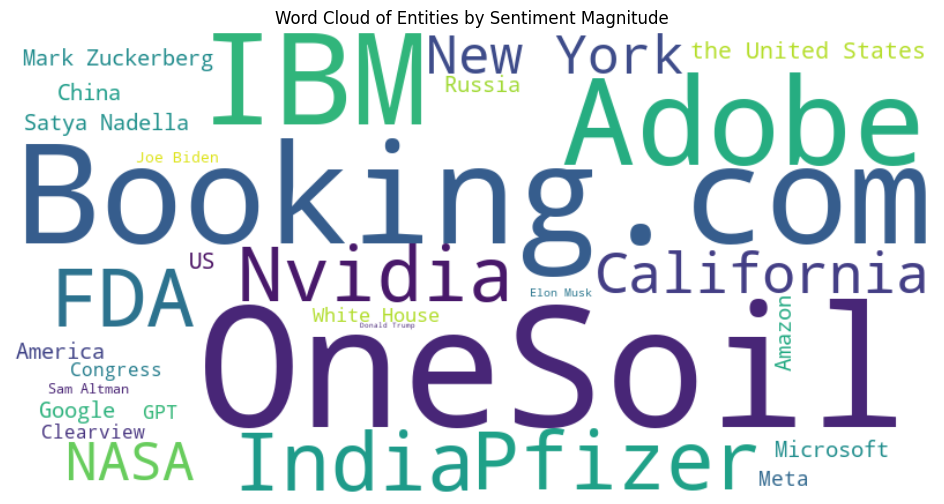

In [51]:
# Ensure the dataframe is sorted by sentiment for better visualization
entities_sent_df = entities_sent_df.sort_values(by="Average Sentiment", ascending=True)

# Create a word frequency dictionary where size represents absolute sentiment value
word_freq = dict(zip(entities_sent_df["Entity"], abs(entities_sent_df["Average Sentiment"])))

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entities by Sentiment Magnitude")
plt.show()

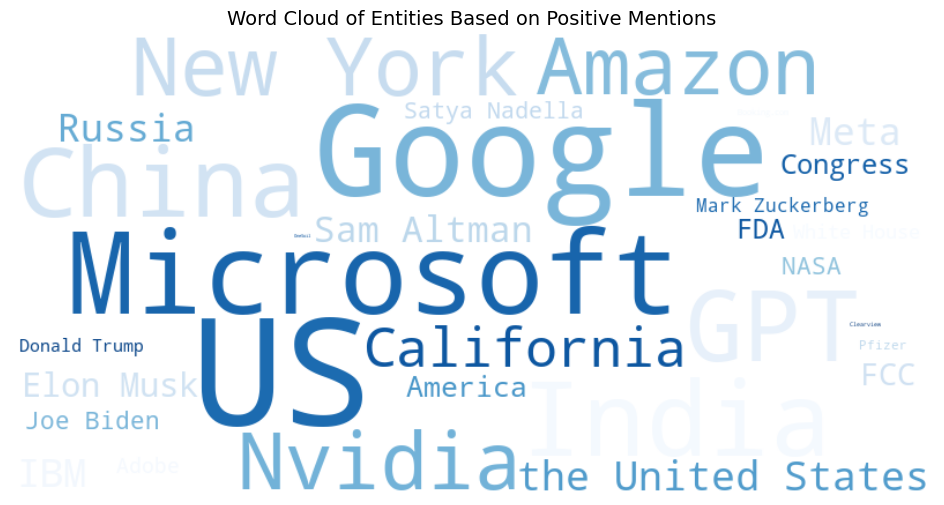

In [56]:
positive_word_freq = dict(zip(
    entities_sent_df["Entity"], 
    entities_sent_df["Positive Instances"]  # Use Positive Instances for word size
))

wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate_from_frequencies(positive_word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entities Based on Positive Mentions", fontsize=14)
plt.show()

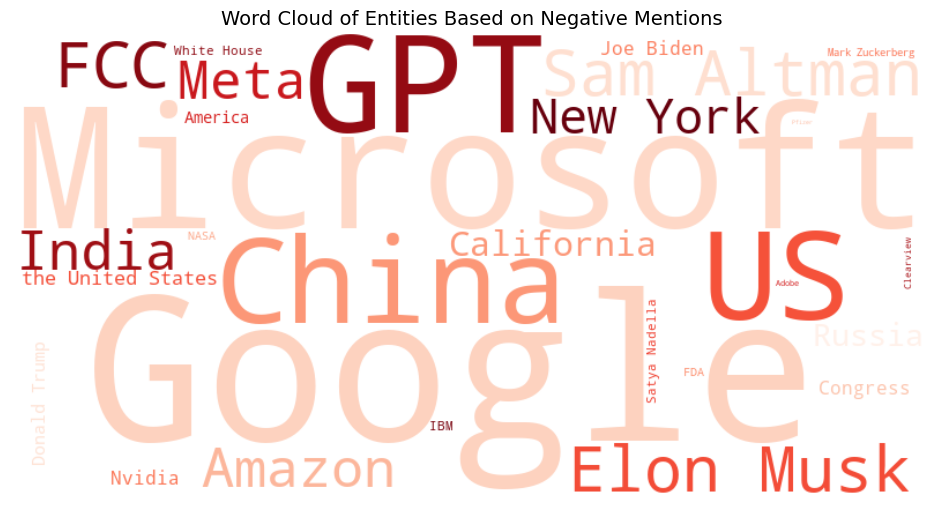

In [57]:
negative_word_freq = dict(zip(
    entities_sent_df["Entity"], 
    entities_sent_df["Negative Instances"]  # Use Negative Instances for word size
))

wordcloud_negative = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(negative_word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entities Based on Negative Mentions", fontsize=14)
plt.show()

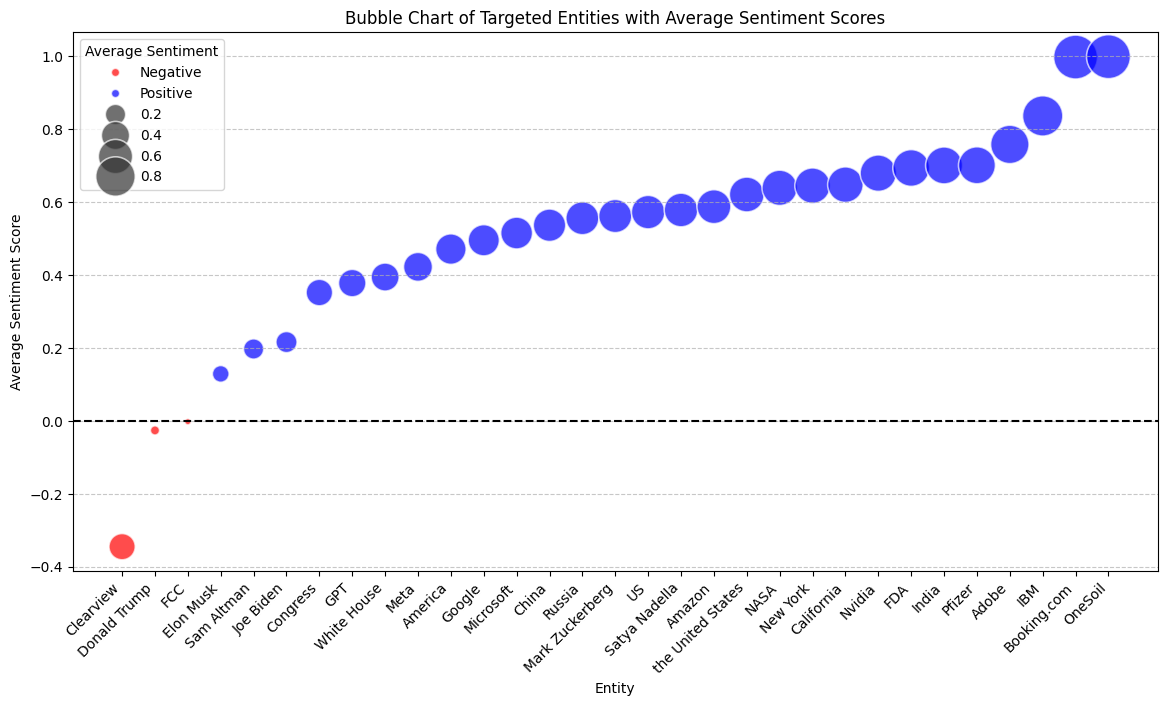

In [52]:
plt.figure(figsize=(14, 7))

# Create a scatter plot (bubble chart) with size representing magnitude of sentiment
sns.scatterplot(
    data=entities_sent_df,
    x="Entity",
    y="Average Sentiment",
    size=abs(entities_sent_df["Average Sentiment"]),  # Bubble size based on sentiment magnitude
    hue=entities_sent_df["Average Sentiment"].apply(lambda x: "Positive" if x > 0 else "Negative"),  # Color based on sentiment type
    sizes=(20, 1000),  # Bubble size range
    alpha=0.7,
    palette={"Positive": "blue", "Negative": "red"}  # Coloring logic
)

plt.xlabel("Entity")
plt.ylabel("Average Sentiment Score")
plt.title("Bubble Chart of Targeted Entities with Average Sentiment Scores")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color="black", linestyle="--")  # Neutral sentiment line
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### Targeted Sentiment pt. 2

In [58]:
target_entities2 = {
    "targets": ["TikTok", "Tesla", "CRM", "ethereum", "shield ai", "verde", "helios", "charlee", "guardforce", "virtus",
                "amd", "av", "huawei cloud", "stable diffusion", "True Fit", "Shopify", "Metronic", "Charlee", "Signet"]
}

In [59]:
target_entity_lookup2 = {entity.lower(): entity for entity in target_entities2["targets"]}

In [60]:
def targeted_sentiment_for_article2(text, ner_entities):
    """
    Computes sentiment scores for target entities found in the article's NER results.
    Returns a dictionary where keys are entities and values are their average sentiment scores.
    """
    if not isinstance(text, str) or not isinstance(ner_entities, dict):
        return None  # Ensure valid input types

    sentences = sent_tokenize(text)
    if not sentences:
        return None  # Skip empty text

    entity_sentiments = {}

    # Extract relevant entities from ner_entities (Checking ORG and PRODUCT types)
    matching_entities = set()

    for entity_type in ["ORG", "PRODUCT"]:  # Check both entity categories
        if entity_type in ner_entities:
            for ent in ner_entities[entity_type]:
                ent_lower = ent.lower()
                if ent_lower in target_entity_lookup2:
                    matching_entities.add(target_entity_lookup2[ent_lower])  # Store original-cased entity

    if not matching_entities:
        return None  # Skip if no matching entities

    for entity in matching_entities:
        target_lower = entity.lower()
        scores = []

        for sent in sentences:
            if target_lower in sent.lower():
                try:
                    result = pipe(sent)[0]
                    score = result['score'] if result['label'] == "POSITIVE" else -result['score']
                    scores.append(score)
                except Exception as e:
                    print(f"Error processing sentence: {sent} -> {e}")  # Debugging

        if scores:
            entity_sentiments[entity] = sum(scores) / len(scores)

    return entity_sentiments if entity_sentiments else None

In [61]:
%%time

df_sub["entity_sentiments2"] = df_sub.parallel_apply(
    lambda row: targeted_sentiment_for_article2(row.get("textandtitle_clean", ""), row.get("ner_entities", {})),
    axis=1
)

CPU times: user 399 ms, sys: 1.33 s, total: 1.72 s
Wall time: 9min 22s


In [65]:
df_temp = df_sub[df_sub["entity_sentiments2"].notna()]

df_temp.head()

,url,date,title_clean,title_clean_lower,text_clean_ner,text_clean_topic,title_text,bert_title_text,topic,textandtitle_clean,ner_entities,entity_sentiments,entity_sentiments2
29569,https://www.carandbike.com/news/elon-musk-says...,2022-09-04,Elon Musk Says Tesla AI Day Pushed To Septembe...,elon musk says tesla ai day pushed to septembe...,Elon Musk Says Tesla AI Day Pushed To Septembe...,elon musk says tesla ai day pushed to septembe...,elon musk says tesla ai day pushed to septembe...,elon musk says tesla ai day pushed 30 elon mus...,11,Elon Musk Says Tesla AI Day Pushed To Septembe...,"{'PERSON': ['Tesla Elon Musk AIRelated', 'Cara...","{'India': -0.9978728294372559, 'Elon Musk': -0...",{'Tesla': -0.193414568901062}
43553,https://www.einpresswire.com/article/556519864...,2021-11-17,AI in Banking Market Future opportunities Tren...,ai in banking market future opportunities tren...,"AI in Banking Market Future opportunities , Tr...",ai in banking market future opportunities tren...,ai in banking market future opportunities tren...,ai banking market future opportunities trend t...,0,AI in Banking Market Future opportunities Tren...,"{'PERSON': ['EIN Presswire', 'Eric Lee Emergen...","{'California': 0.9955044388771057, 'US': 0.980...",{'CRM': 0.9982807636260986}
68763,https://www.khon2.com/technology/ap-technology...,2023-03-30,Musk scientists call for halt to AI race spark...,musk scientists call for halt to ai race spark...,"Musk, scientists call for halt to AI race spar...",musk scientists call for halt to ai race spark...,musk scientists call for halt to ai race spark...,musk scientists call halt ai race sparked chat...,11,Musk scientists call for halt to AI race spark...,"{'PERSON': ['GoBows Bows Football Final HOME',...",{'Elon Musk': -0.999483585357666},{'Tesla': -0.999483585357666}
64975,https://www.thequint.com/amp/story/tech-and-au...,2024-02-23,Who Is Mira Murati the New Interim CEO of Open...,who is mira murati the new interim ceo of open...,"Who Is Mira Murati, the New Interim CEO of Aft...",who is mira murati the new interim ceo of open...,who is mira murati the new interim ceo of open...,mira murati new interim ceo openai sam altmans...,10,Who Is Mira Murati the New Interim CEO of Open...,"{'PERSON': ['Peter Selinger', 'Altman', 'Sam A...","{'Sam Altman': -0.002801761031150818, 'GPT': 0...",{'Tesla': 0.9866754710674286}
51279,https://www.snopes.com/fact-check/stephen-hawk...,2023-05-03,Did Stephen Hawking Warn Artificial Intelligen...,did stephen hawking warn artificial intelligen...,Did Stephen Hawking Warn Artificial Intelligen...,did stephen hawking warn artificial intelligen...,did stephen hawking warn artificial intelligen...,stephen hawking warn artificial intelligence c...,3,Did Stephen Hawking Warn Artificial Intelligen...,"{'PERSON': ['Evan Sharp', 'Geoffrey Hinton', '...","{'US': 0.001592293381690979, 'Google': -0.9953...",{'Tesla': 0.995732843875885}


In [77]:
# Dictionaries to store cumulative stats
entity_sentiment_sum2 = defaultdict(float)  # Total sentiment score (for averaging)
entity_sentiment_count2 = defaultdict(int)  # Count of all sentiment instances
positive_sentiment_count2 = defaultdict(int)  # Count of positive sentiment instances
negative_sentiment_count2 = defaultdict(int)  # Count of negative sentiment instances

# Process sentiment data from df_temp
for _, row in df_temp.iterrows():
    entity_sentiments = row["entity_sentiments2"]
    if isinstance(entity_sentiments, dict):  # Ensure it's a dictionary
        for entity, sentiment in entity_sentiments.items():
            entity_sentiment_sum2[entity] += sentiment  # Sum sentiment scores
            entity_sentiment_count2[entity] += 1  # Track total occurrences
            
            # Count instances of positive and negative sentiment separately
            if sentiment > 0:
                positive_sentiment_count2[entity] += 1
            elif sentiment < 0:
                negative_sentiment_count2[entity] += 1

# Compute average sentiment per entity
entity_avg_sentiment2 = {
    entity: entity_sentiment_sum2[entity] / entity_sentiment_count2[entity]  # Average score
    for entity in entity_sentiment_sum2
}

entities_sent_df2 = pd.DataFrame({
    "Entity": list(entity_avg_sentiment2.keys()),
    "Positive Instances": [positive_sentiment_count2[entity] for entity in entity_avg_sentiment2],
    "Negative Instances": [negative_sentiment_count2[entity] for entity in entity_avg_sentiment2]
})

entities_sent_df = pd.concat([entities_sent_df, entities_sent_df2], ignore_index=True)

In [78]:
entities_sent_df

,Entity,Positive Instances,Negative Instances
0,NASA,215,43
1,Amazon,1046,241
2,GPT,1612,587
3,Microsoft,2207,622
4,Adobe,170,18
5,Russia,587,164
6,India,1815,243
7,US,3292,477
8,China,1536,434
9,Elon Musk,438,340


In [79]:
entities_sent_df['total'] = entities_sent_df['Positive Instances'] + entities_sent_df['Negative Instances']
entities_sent_df['prop_positive'] = entities_sent_df['Positive Instances'] / entities_sent_df['total']

In [80]:
# Ensure the dataframe is sorted by sentiment for better visualization
entities_sent_df = entities_sent_df.sort_values(by="prop_positive", ascending=True)

entities_sent_df.head()

,Entity,Positive Instances,Negative Instances,total,prop_positive
45,helios,0,1,1,0.000000
27,Clearview,5,24,29,0.172414
22,Donald Trump,121,128,249,0.485944
17,FCC,342,340,682,0.501466
9,Elon Musk,438,340,778,0.562982


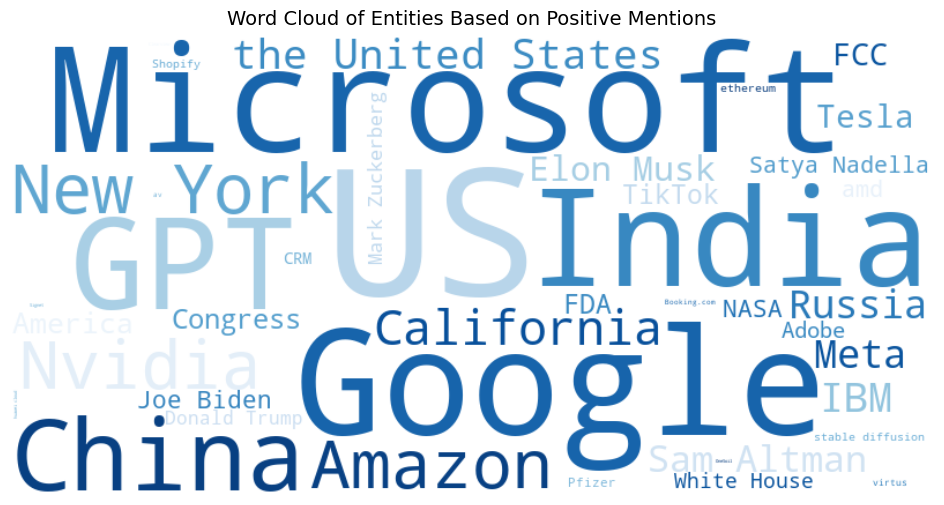

In [72]:
positive_word_freq = dict(zip(
    entities_sent_df["Entity"], 
    entities_sent_df["Positive Instances"]  # Use Positive Instances for word size
))

wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate_from_frequencies(positive_word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entities Based on Positive Mentions", fontsize=14)
plt.show()

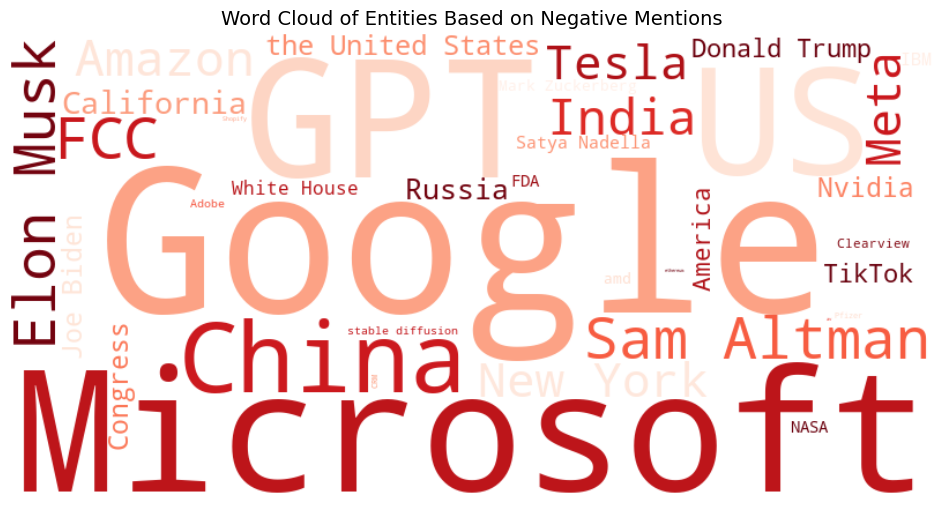

In [73]:
negative_word_freq = dict(zip(
    entities_sent_df["Entity"], 
    entities_sent_df["Negative Instances"]  # Use Negative Instances for word size
))

wordcloud_negative = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate_from_frequencies(negative_word_freq)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Entities Based on Negative Mentions", fontsize=14)
plt.show()

/var/folders/t6/n_h66qsx6rz5862xz5zck5sm0000gq/T/ipykernel_46836/3761232536.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


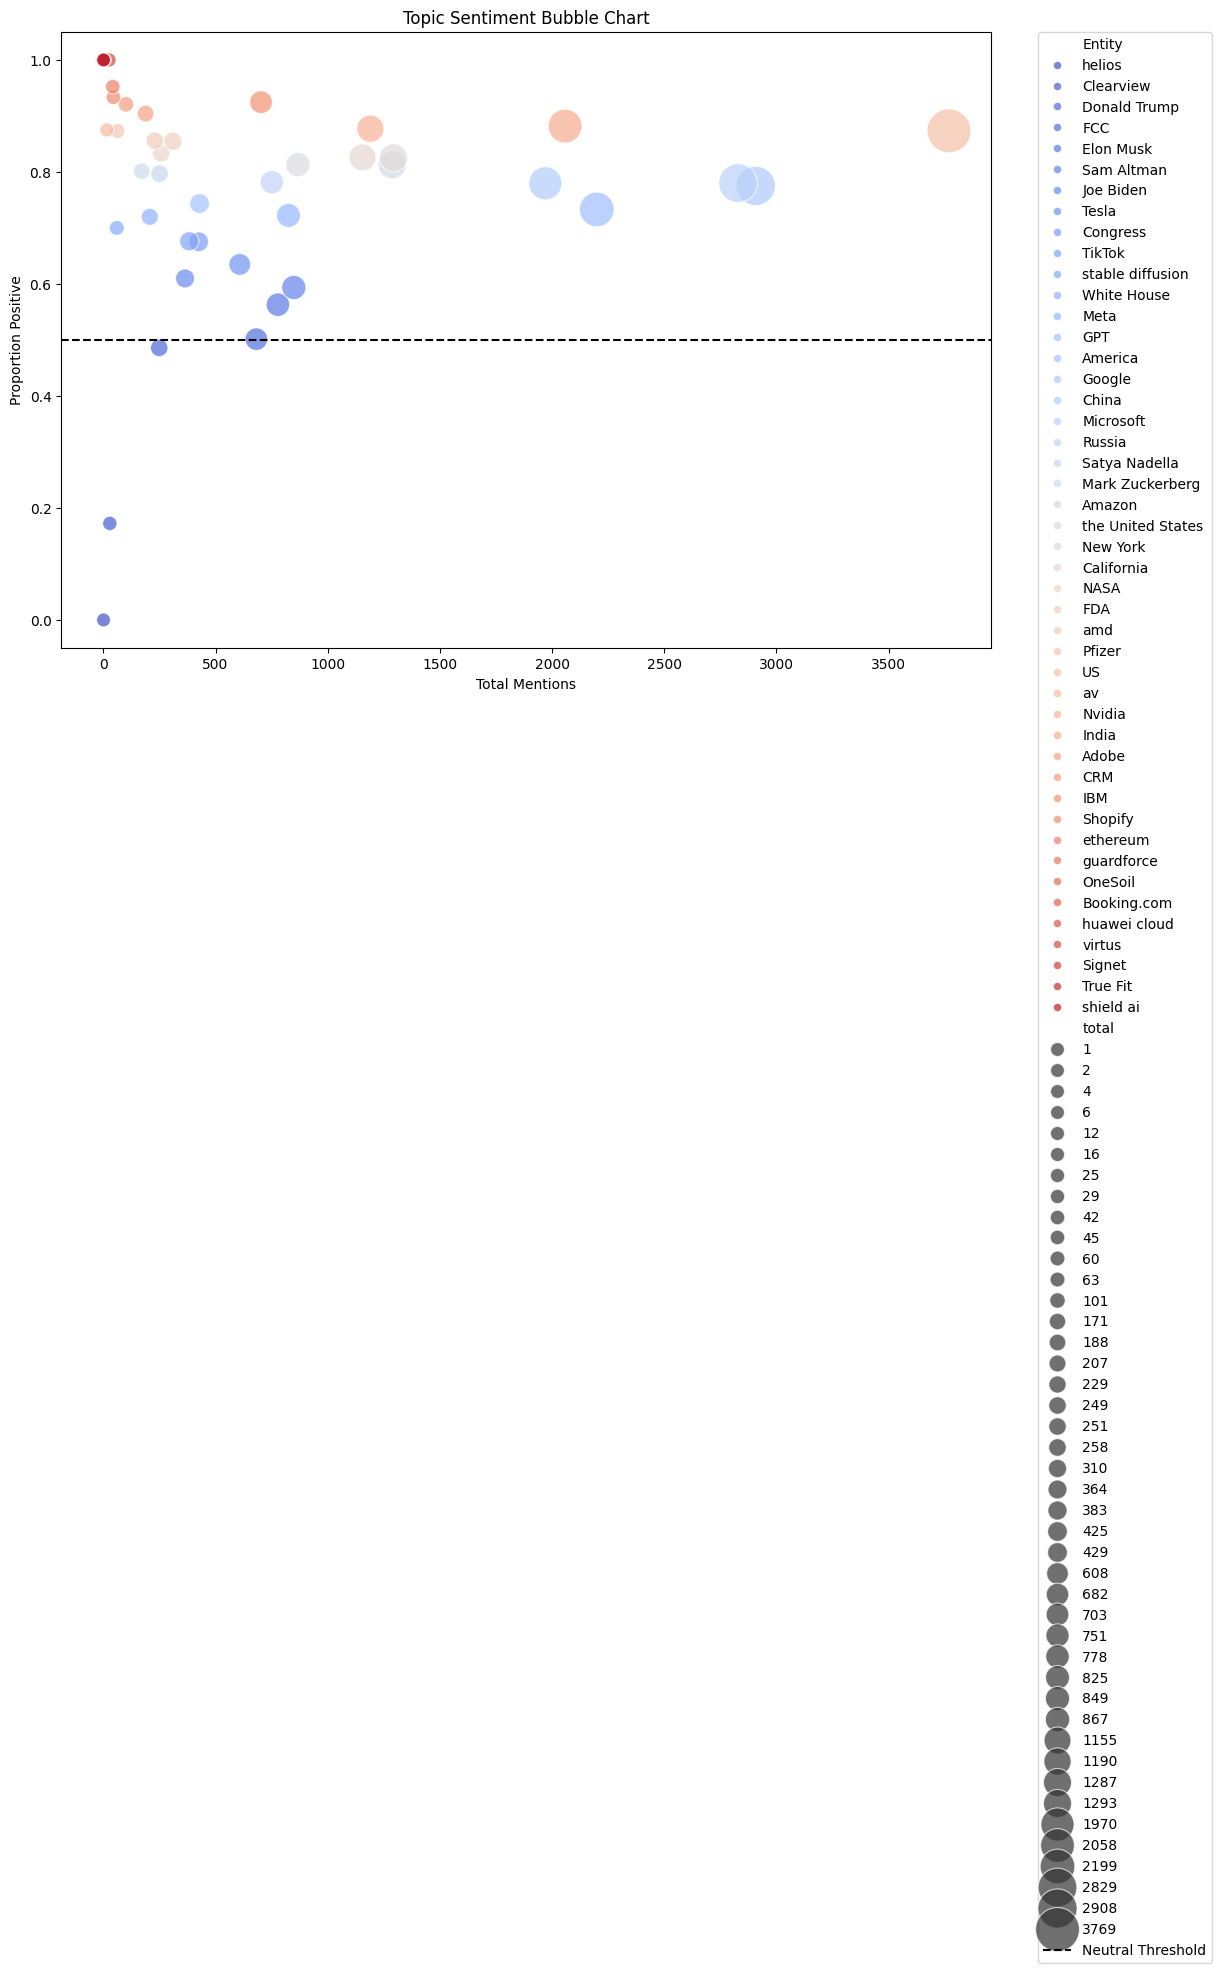

In [81]:
# Create bubble chart using seaborn
plt.figure(figsize=(12, 8))
bubble = sns.scatterplot(
    data=entities_sent_df,
    x='total', 
    y='prop_positive',
    size='total', 
    sizes=(100, 1000),
    hue='Entity', 
    palette='coolwarm',
    alpha=0.7,
    legend='full'
)
plt.xlabel("Total Mentions")
plt.ylabel("Proportion Positive")
plt.title("Topic Sentiment Bubble Chart")
plt.axhline(0.5, color='black', linestyle='--', label="Neutral Threshold")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

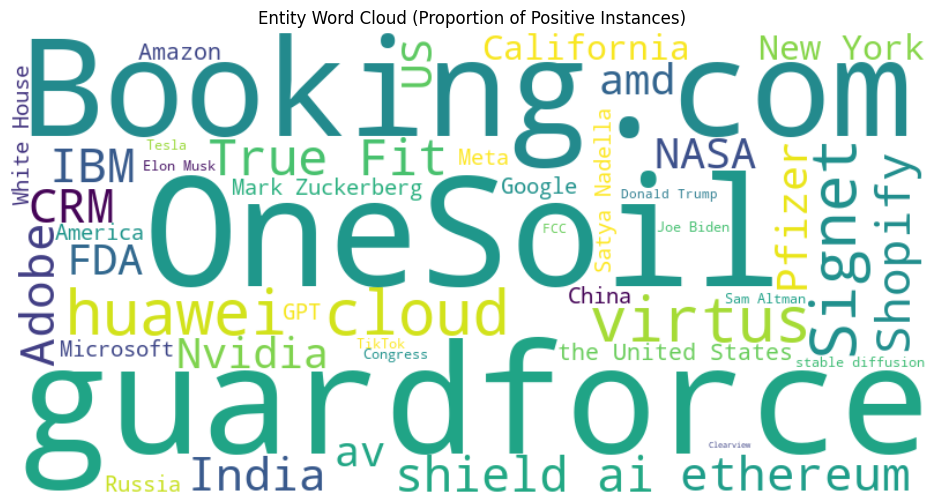

In [87]:
entity_sentiment_dict_temp = dict(zip(entities_sent_df["Entity"], entities_sent_df["prop_positive"]))


# Generate the Word Cloud (topics appear once, colored by positive proportion)
wc_combined = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies({k: abs(v) for k, v in entity_sentiment_dict_temp.items()})

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc_combined, interpolation='bilinear')
plt.axis("off")
plt.title("Entity Word Cloud (Proportion of Positive Instances)")
plt.show()

In [82]:
entities_sent_df['prop_negative'] = entities_sent_df['Negative Instances'] / entities_sent_df['total']

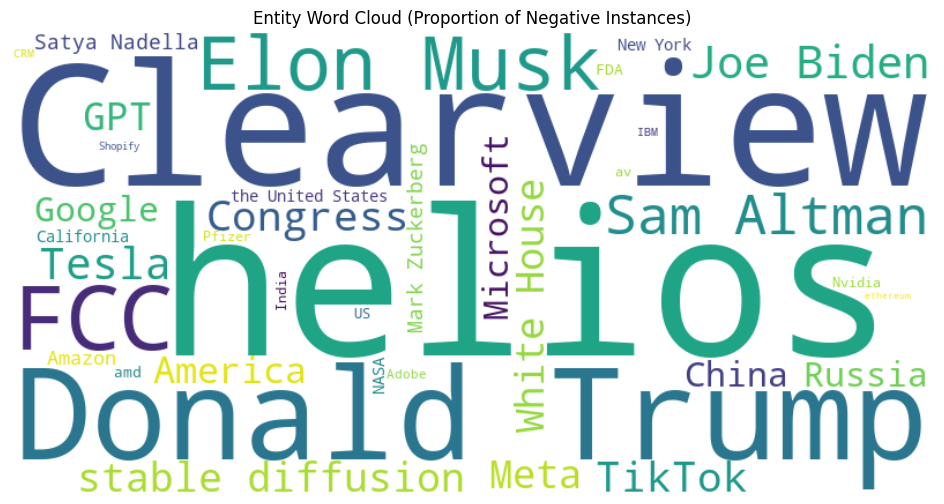

In [84]:
entity_sentiment_dict_temp = dict(zip(entities_sent_df["Entity"], entities_sent_df["prop_negative"]))


# Generate the Word Cloud (topics appear once, colored by positive proportion)
wc_combined = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies({k: abs(v) for k, v in entity_sentiment_dict_temp.items()})

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wc_combined, interpolation='bilinear')
plt.axis("off")
plt.title("Entity Word Cloud (Proportion of Negative Instances)")
plt.show()

In [85]:
entities_sent_df

,Entity,Positive Instances,Negative Instances,total,prop_positive,prop_negative
45,helios,0,1,1,0.000000,1.000000
27,Clearview,5,24,29,0.172414,0.827586
22,Donald Trump,121,128,249,0.485944,0.514056
17,FCC,342,340,682,0.501466,0.498534
9,Elon Musk,438,340,778,0.562982,0.437018
13,Sam Altman,504,345,849,0.593640,0.406360
10,Joe Biden,222,142,364,0.609890,0.390110
31,Tesla,386,222,608,0.634868,0.365132
26,Congress,287,138,425,0.675294,0.324706
34,TikTok,259,124,383,0.676240,0.323760
